In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
import pmdarima
from pmdarima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
from composition_stats import closure

In [7]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [8]:
SLR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR_data.csv"))

In [9]:
SLR_data['Year'] = pd.to_datetime(SLR_data['Year'])
SLR_data =SLR_data.set_index("Year")

In [10]:
test_data= pd.DataFrame(pd.read_csv(
    r"C:\Users\User\Projects\FYP_8\age_structure_data\df_test.csv"))
test_data['Year'] = pd.to_datetime(test_data['Year'])
test_data = test_data.set_index("Year")

In [11]:
SLR_e=SLR_data['log_ratio_e']
SLR_y=SLR_data['log_ratio_y']
SLR_k=SLR_data['log_ratio_k']

In [12]:
def calculate_rmse_for_cv(train_data, test_data, a, b, c):
    arima_model = ARIMA(train_data, order=(a, b, c)).fit()
    prediction = arima_model.predict(
        start=len(train_data), end=len(train_data)+len(test_data)-1)
    rmse = sqrt(mean_squared_error(test_data, prediction))
    return rmse, test_data, prediction

For SLR_e

In [13]:
auto_arima(SLR_e, start_p=0, d=2 ,start_q=0,
           max_p=10, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-397.974, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-398.276, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-399.126, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-399.243, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-397.160, Time=0.21 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.743 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
train_e_1, test_e_1 = train_test_split(SLR_e, test_size=0.2, shuffle=False)
train_e_2, test_e_2 = train_test_split(train_e_1, test_size=0.2, shuffle=False)
train_e_3, test_e_3 = train_test_split(train_e_2, test_size=0.2, shuffle=False)
rmse_e_1, test_data_e_1, prediction_test_e_1=calculate_rmse_for_cv(train_e_1, test_e_1,0,2,0)
rmse_e_2, test_data_e_2, prediction_test_e_2=calculate_rmse_for_cv(train_e_2, test_e_2,0,2,0)
rmse_e_3, test_data_e_3, prediction_test_e_3=calculate_rmse_for_cv(train_e_3, test_e_3,0,2,0)
average_rmse_e=(rmse_e_1+rmse_e_2+rmse_e_3)/3
average_rmse_e

0.01835129281387412

In [15]:
arima_model_e = ARIMA(SLR_e, order=(0, 2, 0)).fit()
prediction_e = arima_model_e.predict(
    start=len(SLR_e), end=len(SLR_e)+len(test_data)-1)
prediction_e = prediction_e.to_frame()
prediction_e.rename(columns = {'predicted_mean':0}, inplace = True)
final_e = pd.concat([SLR_e, prediction_e])

For Transfomed_SLR_y

In [16]:
auto_arima(SLR_y, start_p=0, d=1 ,start_q=0,
           max_p=10, max_d=2, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-417.550, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-450.272, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-439.124, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-318.588, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-450.267, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-450.124, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-446.686, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-444.870, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.630 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [17]:
train_y_1, test_y_1 = train_test_split(SLR_y, test_size=0.2, shuffle=False)
train_y_2, test_y_2 = train_test_split(train_y_1, test_size=0.2, shuffle=False)
train_y_3, test_y_3 = train_test_split(train_y_2, test_size=0.2, shuffle=False)
rmse_y_1, test_data_y_1, prediction_test_y_1=calculate_rmse_for_cv(train_y_1, test_y_1, 1, 1, 0)
rmse_y_2, test_data_y_2, prediction_test_y_2=calculate_rmse_for_cv(train_y_2, test_y_2, 1, 1, 0)
rmse_y_3, test_data_y_3, prediction_test_y_3=calculate_rmse_for_cv(train_y_3, test_y_3, 1, 1, 0)
 
average_rmse_y=(rmse_y_1+rmse_y_2+rmse_y_3)/3
average_rmse_y

0.005335931902838869

In [18]:
arima_model_y = ARIMA(SLR_y, order=(1, 1, 0)).fit()
prediction_y = arima_model_y.predict(
    start=len(SLR_y), end=len(SLR_y)+len(test_data)-1)
prediction_y = prediction_y.to_frame()
prediction_y.rename(columns = {'predicted_mean':0}, inplace = True)
final_y = pd.concat([SLR_y, prediction_y])

For SLR_k

In [19]:
auto_arima(SLR_k, start_p=0, d=1 ,start_q=0,
           max_p=10, max_d=2, max_q=10, m=1, trace=True, stepwise=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-397.930, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-451.734, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-428.912, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-305.547, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-451.062, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-451.327, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-449.101, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-442.808, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.791 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [20]:
train_k_1, test_k_1 = train_test_split(SLR_k, test_size=0.2, shuffle=False)
train_k_2, test_k_2 = train_test_split(train_k_1, test_size=0.2, shuffle=False)
train_k_3, test_k_3 = train_test_split(train_k_2, test_size=0.2, shuffle=False)
rmse_k_1, test_data_k_1, prediction_test_k_1=calculate_rmse_for_cv(train_k_1, test_k_1, 1, 1, 0)
rmse_k_2, test_data_k_2, prediction_test_k_2=calculate_rmse_for_cv(train_k_2, test_k_2, 1, 1, 0)
rmse_k_3, test_data_k_3, prediction_test_k_3=calculate_rmse_for_cv(train_k_3, test_k_3, 1, 1, 0)
 
average_rmse_k=(rmse_k_1+rmse_k_2+rmse_k_3)/3
average_rmse_k

0.014655066370072497

In [21]:
arima_model_k = ARIMA(SLR_k, order=(1, 1, 0)).fit()
prediction_k = arima_model_k.predict(
    start=len(SLR_k), end=len(SLR_k)+len(test_data)-1)
prediction_k = prediction_k.to_frame()
prediction_k.rename(columns = {'predicted_mean':0}, inplace = True)
final_k = pd.concat([SLR_k, prediction_k])

Combine part

In [22]:
final_e.rename(columns = {0:'log_ratio_e'}, inplace = True)
final_y.rename(columns = {0:'log_ratio_y'}, inplace = True)
final_k.rename(columns = {0:'log_ratio_k'}, inplace = True)

In [23]:
def SLR_inv(df1,df2,df3):
    arr_e = df1.to_numpy()
    arr_y = df2.to_numpy()
    arr_k = df3.to_numpy()
    e_log_ratio = pd.DataFrame(arr_e,columns=['e_log_ratio'])
    y_log_ratio = pd.DataFrame(arr_y,columns=['y_log_ratio'])
    k_log_ratio = pd.DataFrame(arr_k,columns=['y_log_ratio'])
    e2_arr=[]
    y2_arr=[]
    k2_arr=[]
    for i in range(len(df1)):
        A = e_log_ratio._get_value(i,0,takeable = True)
        B = y_log_ratio._get_value(i,0,takeable = True)
        C = k_log_ratio._get_value(i,0,takeable = True)
        e2_arr.append(1)
        y2_arr.append(((1/10**A)+1)/((1/10**B)+1))
        k2_arr.append(((1/10**A)+1)/((1/10**C)+1))
    e_prepro = pd.DataFrame(e2_arr, columns=['e_prepro'])
    y_prepro = pd.DataFrame(y2_arr, columns=['y_prepro'])
    k_prepro = pd.DataFrame(k2_arr, columns=['k_prepro'])
    prepro = pd.concat([e_prepro, y_prepro,k_prepro],axis=1)
    data_proportion = closure(prepro)
    return data_proportion



In [24]:
data_proportion=SLR_inv(final_e,final_y,final_k)

In [25]:
def set_col(df):
    df = pd.DataFrame(df, columns=[
    'elder', 'youth', 'kid'])
    df['Year'] = df.index + 1964
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    return df

In [26]:
proportion = set_col(data_proportion)

In [27]:
df_actual=proportion[(proportion.index< '2010-01-01')]
df_forecast=proportion[(proportion.index> '2009-01-01')]

In [28]:
proportion_actual_1=SLR_inv(test_data_e_1, test_data_y_1,  test_data_k_1)
proportion_actual_2=SLR_inv(test_data_e_2, test_data_y_2, test_data_k_2)
proportion_actual_3=SLR_inv(test_data_e_3, test_data_y_3, test_data_k_3)
proportion_forecast_1=SLR_inv(prediction_test_e_1, prediction_test_y_1, prediction_test_k_1)
proportion_forecast_2=SLR_inv(prediction_test_e_2, prediction_test_y_2,prediction_test_k_2)
proportion_forecast_3=SLR_inv(prediction_test_e_3, prediction_test_y_3,prediction_test_k_3)

In [29]:
rmse1 = sqrt(mean_squared_error(proportion_actual_1, proportion_forecast_1))
rmse2 = sqrt(mean_squared_error(proportion_actual_2, proportion_forecast_2))
rmse3 = sqrt(mean_squared_error(proportion_actual_3, proportion_forecast_3))

rmse_cv=(rmse1+rmse2+rmse3)/3
rmse_cv

0.004823228314051514

In [30]:
rmse_final = sqrt(mean_squared_error(df_forecast, test_data))
rmse_final

0.007979799332713889

In [31]:
df_forecast.to_csv(relative_path+"\\age_structure_data\\auto_SLR_forecast.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

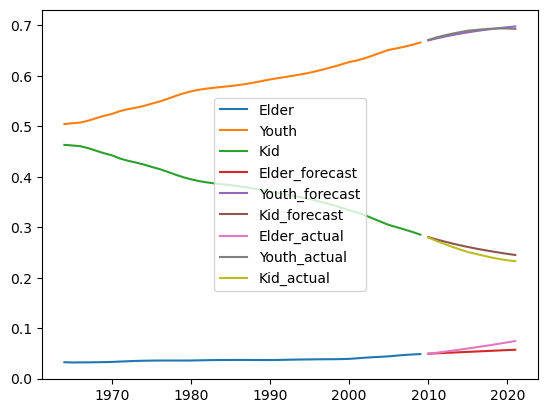

In [32]:
plt.plot(df_actual['elder'],label="Elder")
plt.plot(df_actual['youth'],label="Youth")
plt.plot(df_actual['kid'],label="Kid")
plt.plot(df_forecast['elder'],label="Elder_forecast")
plt.plot(df_forecast['youth'],label="Youth_forecast")
plt.plot(df_forecast['kid'],label="Kid_forecast")
plt.plot(test_data['elder'],label="Elder_actual")
plt.plot(test_data['youth'],label="Youth_actual")
plt.plot(test_data['kid'],label="Kid_actual")



plt.legend(loc='best')
plt.show